In [4]:
import urllib2
import json
import re
import io
import copy
import nltk, re, pprint
import os
import time
import calendar
import datetime
from threading import Thread
from time import sleep
import codecs
from HTMLParser import HTMLParser
import os

In [26]:
movieAproved = []
for f in os.listdir("DoneMovies/"):
    movieAproved.append(f[:-4])

In [27]:
movieAproved[0]

'tt0074486'

In [28]:
movieGenreList = []
with open('Movies.txt','r') as f:
    for line in f:
        if line.split(None, 1)[0] in movieAproved:
            moviegenre = re.search(r'(\w\w\w\w\w\w\w\w\w)\t.+\t([\w,-]+)\n', line)
            if moviegenre:
                #print "moviegenre.group() : ",  moviegenre.group(1) +" "+ moviegenre.group(2)
                movieGenreList.append(moviegenre.group(1) +" "+ moviegenre.group(2))
            else:
                print ("None Type:"+line.split(None, 1)[0])

In [29]:
len(movieGenreList)

4398

In [30]:
for moviegenres in movieGenreList:
    splitted = moviegenres.split()
    movieid = splitted[0]
    moviegen = splitted[1]
    if (not os.path.isfile("MovieGenres/" + movieid +".txt") or os.path.getsize("MovieGenres/" + movieid +".txt") == 0):
        f = codecs.open("MovieGenres/" + movieid +".txt", "w", "utf-8")
        f.write(moviegen)
        f.close()

In [31]:
print movieGenreList[0].split(',')

['tt0307987 Comedy', 'Crime', 'Drama']


In [32]:
for filename in os.listdir('MovieGenres'):
    with open("MovieGenres/" + filename) as movie:
        genres = movie.read().split(',')
        for gen in genres:
            try:
                f = io.open("GenreList/" + gen + ".txt", 'a', encoding='utf-8')
                f.write(unicode(filename[:-4]) + "\n")
                f.close()
            except:
                f = io.open("GenreList/" + gen + ".txt", 'w', encoding='utf-8')
                f.write(unicode(filename[:-4]) + "\n")
                f.close()
        

In [ ]:
for filename in os.listdir('MovieGenres'):
    with open("GenreList/" + filename) as movie:
        genres = movie.read().split(',')

In [33]:
actionList =  []
with open("GenreList/Action.txt") as f:
     actionList = f.readlines()
for movienumber in range(0, len(actionList)):
    actionList[movienumber] = actionList[movienumber].rstrip()

In [36]:
words = ""
for idd in actionList:
    with codecs.open("DoneMoviesReviews/" + idd + ".txt", "r", "utf-8") as myfile:
        data=myfile.read().replace('\n', '')
        data=data.replace("<|_=00=_|>", "")
        data = re.sub('[^a-zA-Z0-9-_*.]', ' ', data)
        words = words + ''.join(data)

In [14]:
words

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [38]:
more_stopwords = {'movie', 'film','action'}
STOPWORDS = STOPWORDS.union(more_stopwords)

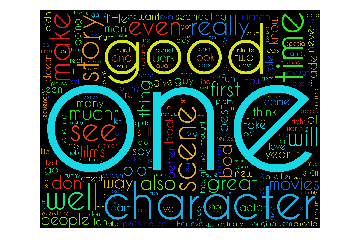

In [39]:
wordcloud = WordCloud(
                      font_path='CaviarDreams.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()